In [83]:
import pandas as pd

In [275]:
def lagrange_function(x, u, c, A, b):
    return objective_function(c, x) + inner_product(u, subgradient(x, A, b))
def subgradient(x, A, b):
    return [b[i] - inner_product(A[i], x) for i in range(len(b))]
def objective_function(c, x):
    return inner_product(c, x)
def inner_product(vector1, vector2):
    product = 0
    for i, vi in enumerate(vector1):
        product = product + vi*vector2[i]
    return product
def is_vector_zero(vector1):
    for i, vi in enumerate(vector1):
         if vi != 0:
                return False
    return True

In [277]:
def LR(u, c, A, b):
    best_x = [0 for j in range(len(c))]
    for j, cj in enumerate(c):
        aux = 0
        for i in range(len(u)):
            aux = aux + u[i]*A[i][j]
        if cj - aux > 0:
            best_x[j] = 1
        #elif c()[i]-u*A()[i] == 0 and
    max_value = lagrange_function(best_x, u, c, A, b)
    return max_value, best_x

def subgradient_method(c, A, b, uk, mik = 0.1, pho=0.95, max_iterations=100):
    df = pd.DataFrame(columns=['uk', 'dk', 'xuk', 'zuk', 'c*xuk'])
    k = 0
    subgradient_not_zero = True
    while k < max_iterations and (k < max_iterations or subgradient_not_zero):
        (zuk, xuk) = LR(uk, c, A, b)        
        dk = subgradient(xuk, A, b)       
        uk = [max(0, uk[i] - mik*dk[i]) for i in range(len(dk))]
        mik = pho*mik
        subgradient_not_zero = !is_vector_zero(dk)
        k = k + 1
        df.loc[k] = [[round(uk[i],4) for i in range(len(uk))] , dk, xuk, round(zuk,4), objective_function(c, xuk)]                
    return df

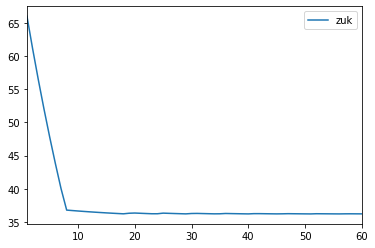

In [51]:
A_p1 = [[2, 1, 6, 5]]
c_p1 = [10, 7, 25, 24]
b_p1 = [7]
df_subgrad_p1 = subgradient_method(c_p1, A_p1, b_p1, uk=[0], max_iterations=60)
df_subgrad_p1.plot(y='zuk')

In [273]:
df_subgrad_p1.tail()

,uk,dk,xuk,zuk,c*xuk
56,[4.8036],[-1],"[1, 1, 0, 1]",36.2023,41
57,[4.781],[4],"[1, 1, 0, 0]",36.2146,17
58,[4.7864],[-1],"[1, 1, 0, 1]",36.219,41
59,[4.7915],[-1],"[1, 1, 0, 1]",36.2136,41
60,[4.7963],[-1],"[1, 1, 0, 1]",36.2085,41


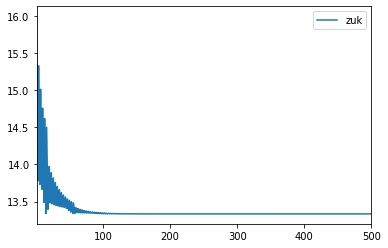

In [278]:
A_p2 = [[5, 4, 4], [9, 3, 5]]
b_p2 = [10, 11]
c_p2 = [4, 5, 7]
df_subgrad_p2 = subgradient_method(c_p2, A_p2, b_p2, uk=[0, 0], max_iterations=500)
df_subgrad_p2.plot(y='zuk')	

In [280]:
df_subgrad_p2.tail(500)

,uk,dk,xuk,zuk,c*xuk
1,"[0.3, 0.6]","[-3, -6]","[1, 1, 1]",16,16
2,"[0.11, 0.315]","[2, 3]","[0, 1, 1]",14.4,12
3,"[0.3808, 0.8565]","[-3, -6]","[1, 1, 1]",13.78,16
4,"[0.2093, 0.5993]","[2, 3]","[0, 1, 1]",15.331,12
5,"[0.0464, 0.3549]","[2, 3]","[0, 1, 1]",14.2164,12
...,...,...,...,...,...
496,"[0.0, 0.4444]","[-3, -6]","[1, 1, 1]",13.3333,16
497,"[0.0, 0.4444]","[2, 3]","[0, 1, 1]",13.3333,12
498,"[0, 0.4444]","[2, 3]","[0, 1, 1]",13.3333,12
499,"[0.0, 0.4444]","[-3, -6]","[1, 1, 1]",13.3333,16


In [59]:
def get_bin_combinations_vectors():
    binar = [0,1]
    result = []
    for a in binar:
        for b in binar:
            for c in binar:
                for d in binar:
                    result.append([a, b, c, d])
    return result

In [81]:
u = df_subgrad_p2['uk'].tail(1)
uk = [uk[i] for i in range(len(uk)) for uk in u]
df = pd.DataFrame(columns=['x', 'c*x', 'b-Ax', 'lagrange(x, uk='+str([round(uk[i],4) for i in range(len(uk))])+')'])
for i, x in enumerate(get_bin_combinations_vectors()):
    df.loc[i] = [x, objective_function(c_p2, x), subgradient(x, A_p2, b_p2), lagrange_function(x, uk, c_p2, A_p2, b_p2)]
df.sort_values('c*x', ascending=False)

,x,c*x,b-Ax,"lagrange(x, uk=[0.0, 0.4444])"
14,"[1, 1, 1, 0]",16,"[-3, -6]",13.3336
15,"[1, 1, 1, 1]",16,"[-3, -6]",13.3336
6,"[0, 1, 1, 0]",12,"[2, 3]",13.3332
7,"[0, 1, 1, 1]",12,"[2, 3]",13.3332
10,"[1, 0, 1, 0]",11,"[1, -3]",9.6668
11,"[1, 0, 1, 1]",11,"[1, -3]",9.6668
12,"[1, 1, 0, 0]",9,"[1, -1]",8.5556
13,"[1, 1, 0, 1]",9,"[1, -1]",8.5556
2,"[0, 0, 1, 0]",7,"[6, 6]",9.6664
3,"[0, 0, 1, 1]",7,"[6, 6]",9.6664


In [212]:
import pyomo.environ as pe
import pyomo as pyo

In [260]:
def linear_model(c, A, b, _domain=pe.NonNegativeReals, bound=None):
    model = pe.ConcreteModel()
    model.J = pe.RangeSet(0, len(c)-1)
    model.I = pe.RangeSet(0, len(b)-1)
    model.x = pe.Var(model.J, domain=_domain, bounds=(0,bound))    
    def obj_rule(model):
        return sum(c[j]*model.x[j] for j in model.J)
    model.obj = pe.Objective(rule=obj_rule, sense=pe.maximize)        
    def constraint_rule(model, i):
        return sum(A[i][j]*model.x[j] for j in model.J) <= b[i]
    model.cap_constraint = pe.Constraint(model.I, rule=constraint_rule)
    solver = pyo.opt.SolverFactory('cbc')
    results = solver.solve(model)
    return model

In [262]:
linear_relaxation = linear_model(c_p2, A_p2, b_p2, bound=1)
print(linear_relaxation.obj())   
for i in range(len(c_p2)):
    print(linear_relaxation.x[i]())

13.33333332
0.33333333
1.0
1.0


In [281]:
binary_model = linear_model(c_p2, A_p2, b_p2, pe.Binary)
print(binary_model.obj())  
for i in range(len(c_p2)):
    print(binary_model.x[i]())
#model.display()
model.pprint()

12.0
0.0
1.0
1.0
2 RangeSet Declarations
    I : Dim=0, Dimen=1, Size=2, Domain=Integers, Ordered=True, Bounds=(0, 1)
        Virtual
    J : Dim=0, Dimen=1, Size=3, Domain=Integers, Ordered=True, Bounds=(0, 2)
        Virtual

1 Var Declarations
    x : Size=3, Index=J
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 4*x[0] + 5*x[1] + 7*x[2]

1 Constraint Declarations
    cap_constraint : Size=2, Index=I, Active=True
        Key : Lower : Body                     : Upper : Active
          0 :  -Inf : 5*x[0] + 4*x[1] + 4*x[2] :  10.0 :   True
          1 :  -Inf : 9*x[0] + 3*x[1] + 5*x[2] :  11.0 :   True

5 Declarations: J I x obj cap_constraint


In [267]:
linear_relaxation = linear_model(c_p1, A_p1, b_p1, bound=1)
print(linear_relaxation.obj())   
for i in range(len(c_p2)):
    print(linear_relaxation.x[i]())

36.2
1.0
1.0
0.0


In [269]:
binary_model = linear_model(c_p1, A_p1, b_p1, pe.Binary)
print(binary_model.obj())
for i in range(len(c_p2)):
    print(binary_model.x[i]())

34.0
1.0
0.0
0.0
